In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train_original = train.copy()
test_original = test.copy()

In [6]:
train.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

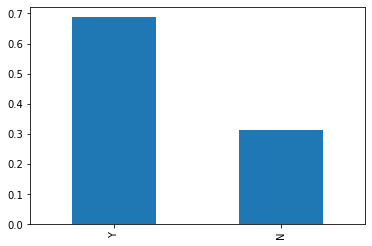

In [10]:
#Univariate Analysis
#first look at the target variable


Loan_ID


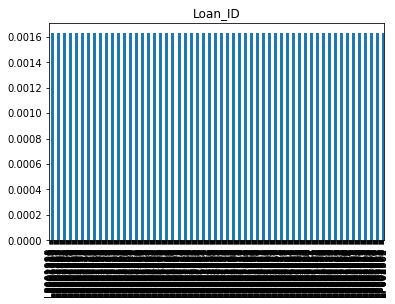

Gender


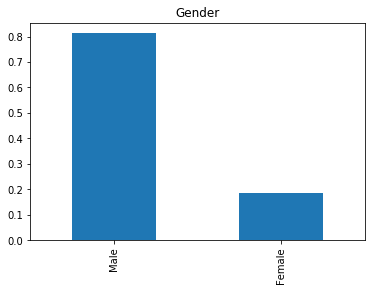

Married


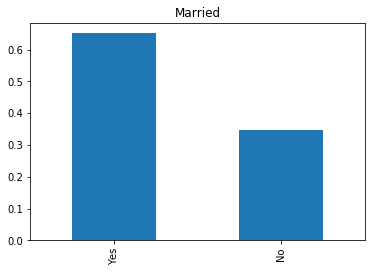

Dependents


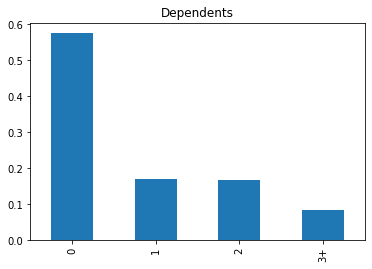

Education


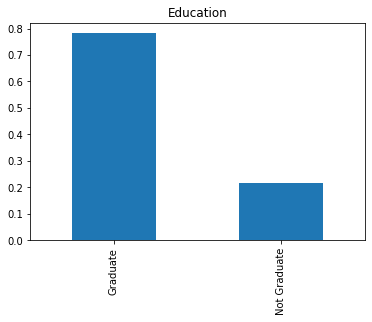

Self_Employed


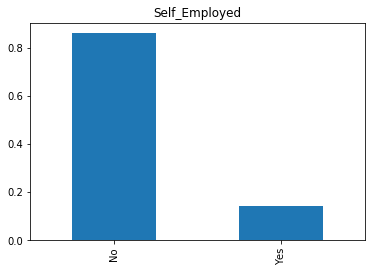

ApplicantIncome


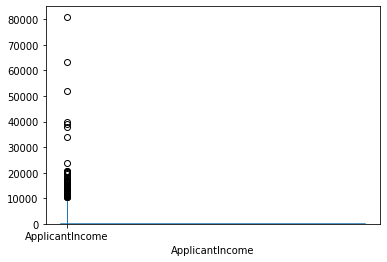

CoapplicantIncome


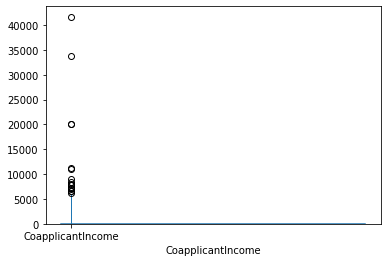

LoanAmount


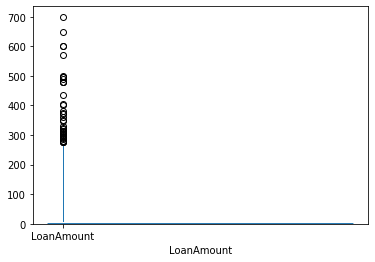

Loan_Amount_Term


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

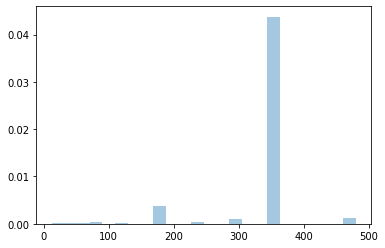

In [26]:
for x in train.columns:
    print(x)
    if train[x].dtypes == 'object':
        train[x].value_counts(normalize=True).plot.bar(title=x)
        plt.show()
    else:
        sns.distplot(train[x])
        train[x].plot.box()
        plt.show()
    

In [27]:
#Bivariate Analysis
#relation between target variable and categorical independent variables
pd.crosstab(train['Gender'],train['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


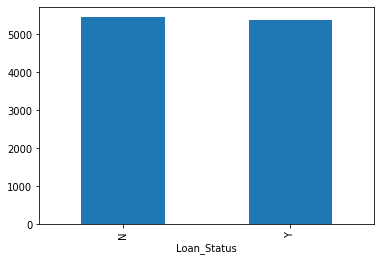

In [28]:
#relation between target variable and numerical variables
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [30]:
#bin the numerical variable
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

In [33]:
pd.crosstab(train['Income_bin'],train['Loan_Status'])

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
High,45,98
Very High,46,91


In [34]:
train = train_original.copy()

In [37]:
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

In [70]:
#check missing value
train.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [46]:
#impute missing numerical with mean or median, categorical with mode
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [48]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [49]:
#remove the skewness
train['LoanAmount_log']=np.log(train['LoanAmount'])

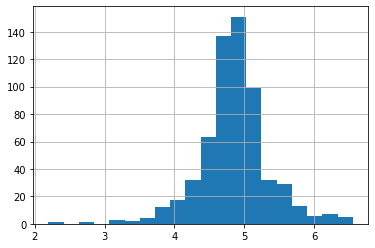

In [50]:
train['LoanAmount_log'].hist(bins=20)

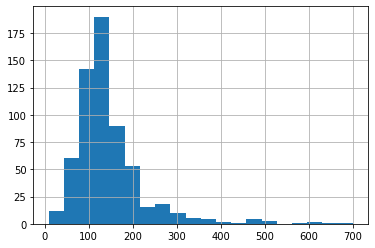

In [51]:
train['LoanAmount'].hist(bins=20)

In [ ]:
#can add some feature engineering steps based on domain knowledge


In [55]:
#
train=train.drop('Loan_ID',axis=1)


KeyError: "['Loan_ID'] not found in axis"

In [56]:
test=test.drop('Loan_ID',axis=1)

In [57]:
X=train.drop('Loan_Status',1)

In [58]:
y=train.Loan_Status

In [59]:
#first try logistic regressin
#before doing that we need to convert categorical variable to series of 0,1

X=pd.get_dummies(X)

In [ ]:
# Feature Scaling for input features.
from sklearn import preprocessing


scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [61]:
#split train test dataset

from sklearn.model_selection import train_test_split

In [62]:
X_train, X_cv, y_train, y_cv = train_test_split(X,y,test_size=0.3)

In [96]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [64]:
'''
C parameter represents inverse of regularization strength.
Regularization is applying a penalty to reduce overfitting.
smaller C specify stronger regularization

'''

'\nC parameter represents inverse of regularization strength.\nRegularization is applying a penalty to reduce overfitting.\nsmaller C specify stronger regularization\n\n'

In [67]:
#perform cross validation
from sklearn.model_selection import StratifiedKFold

score 0.8048780487804879


C:\Users\lyouc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


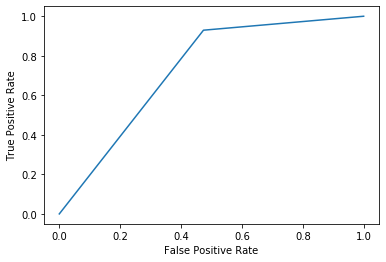

C:\Users\lyouc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


score 0.8373983739837398


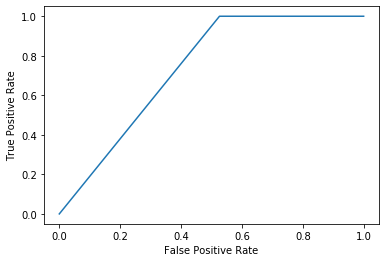

score 0.7804878048780488


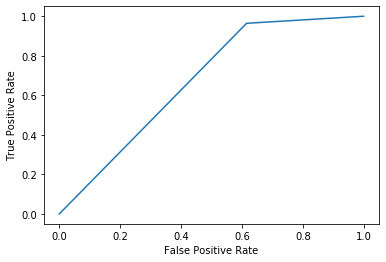

score 0.7886178861788617


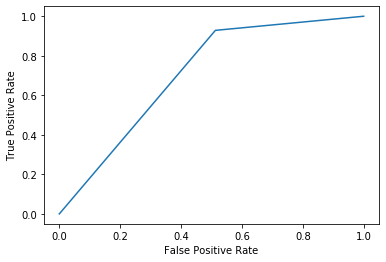

score 0.7950819672131147


C:\Users\lyouc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


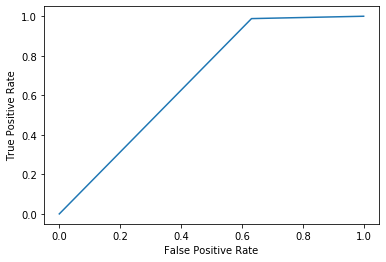

In [87]:
i=1

skf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index, test_index in skf.split(X_train,y_train):
    
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    model = LogisticRegression(random_state=1)
    
    model.fit(x_train_fold,y_train_fold)
    pred_test=model.predict(x_test_fold)
    
    score = accuracy_score(y_test_fold,pred_test)
    
#     lst_accu_stratified.append(model.score(x_test_fold,y_test_fold))
    print('score',score)
    
    fpr, tpr, _ = metrics.roc_curve(y_test_fold,pred_test)
    auc=metrics.roc_auc_score(y_test_fold,pred_test)
    plt.plot(fpr,tpr,label=auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # plt.legend(loc=4)
    plt.show()
    
    i+=1

In [93]:
pred_test = model.predict(X)
pred = model.predict_proba(X)[:,1]

In [ ]:
#continue with more complex model


In [95]:
from sklearn import tree

In [98]:

skf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index, test_index in skf.split(X_train, y_train):
    
    xtr, xvl = X_train.iloc[train_index], X_train.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    
    model.fit(xtr,ytr)
    
    pred_test=model.predict(xvl)
    
    score=accuracy_score(yvl,pred_test)
    
    print('accuracy_score',score)
    

accuracy_score 0.5232558139534884
accuracy_score 0.5465116279069767
accuracy_score 0.6395348837209303
accuracy_score 0.5930232558139535
accuracy_score 0.4588235294117647


In [99]:
pred_test=model.predict(X_cv)

In [100]:
accuracy_score(y_cv,pred_test)

0.5675675675675675

In [101]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier


skf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index, test_index in skf.split(X_train, y_train):
    
    xtr, xvl = X_train.iloc[train_index], X_train.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    
    model = RandomForestClassifier(random_state=1,max_depth=10)
    
    model.fit(xtr,ytr)
    
    pred_test=model.predict(xvl)
    
    score=accuracy_score(yvl,pred_test)
    
    print('accuracy_score',score)
    

accuracy_score 0.6627906976744186
accuracy_score 0.6511627906976745
accuracy_score 0.6511627906976745
accuracy_score 0.6162790697674418
accuracy_score 0.6352941176470588


In [102]:
pred_test=model.predict(X_cv)
accuracy_score(y_cv,pred_test)

0.6594594594594595

In [103]:
#tune the hyperparameters for this model by using grid search to get the optimized values of hyper parameters

#look for max_depth and n_estimators parameters (number of trees that will be used in random forest model)

from sklearn.model_selection import GridSearchCV


In [109]:
paramgrid = {'max_depth':list(range(1,20,2)),
'n_estimators': list(range(1,200,20))}

In [110]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [111]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [112]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [118]:
#Random Forest with optimal parameters
from sklearn.ensemble import RandomForestClassifier


skf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index, test_index in skf.split(X_train, y_train):
    
    xtr, xvl = X_train.iloc[train_index], X_train.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    
    model = RandomForestClassifier(random_state=1,max_depth=3,n_estimators=100)
    
    model.fit(xtr,ytr)
    
    pred_test=model.predict(xvl)
    
    score=accuracy_score(yvl,pred_test)
    
    print('accuracy_score',score)

accuracy_score 0.6976744186046512
accuracy_score 0.6976744186046512
accuracy_score 0.7093023255813954
accuracy_score 0.6395348837209303
accuracy_score 0.6352941176470588


In [119]:
pred_test=model.predict(X_cv)
accuracy_score(y_cv,pred_test)

0.6864864864864865

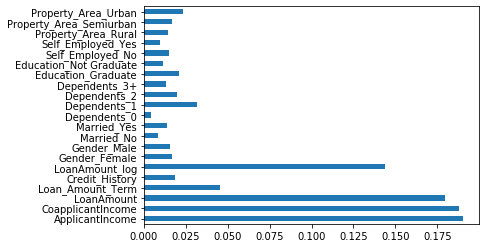

In [120]:
#see feature importance

importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh')

In [128]:
#XGBoost
#XGBoost only works with numeric variables

In [126]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [127]:
from xgboost import XGBClassifier

In [129]:

skf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index, test_index in skf.split(X_train, y_train):
    
    xtr, xvl = X_train.iloc[train_index], X_train.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    
    model = XGBClassifier(n_estimators=50,max_depth=4)
    
    model.fit(xtr,ytr)
    
    pred_test=model.predict(xvl)
    
    score=accuracy_score(yvl,pred_test)
    
    print('accuracy_score',score)

C:\Users\lyouc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:03:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.6162790697674418
[18:03:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.6162790697674418
[18:03:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ac